In [4]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/1q/55_hyr_s2yn5mq7kg51b2f1m0000gn/T/ipykernel_98363/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def string_to_list(string):
    """
    Converts a string representation of a list with missing commas into a list of floats.
    """
    cleaned = string.strip('[]').split(' ')
    return [float(item) for item in cleaned if item]

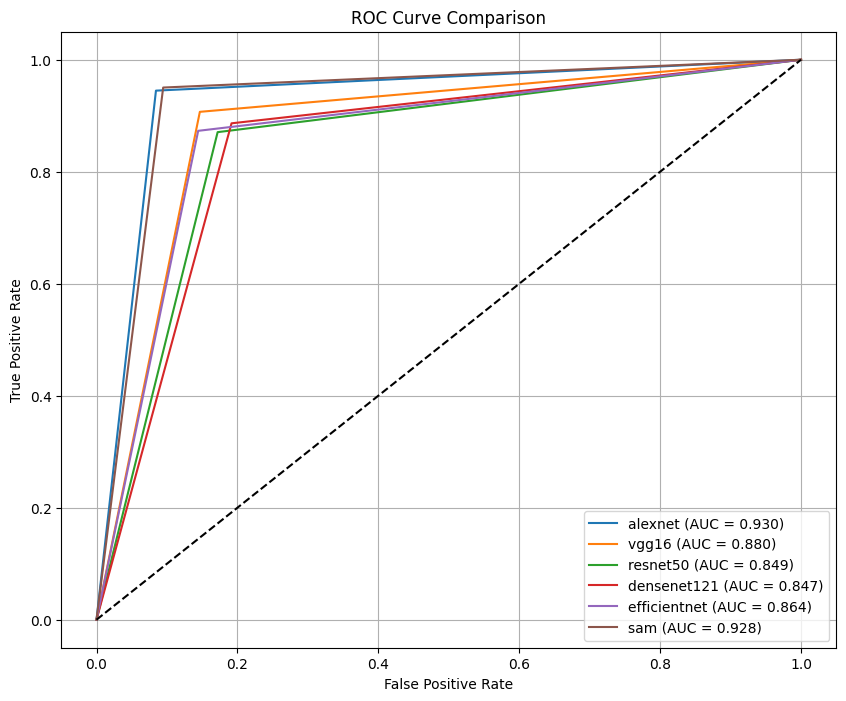

In [7]:
# Load the data from the CSV files
file_paths = [
    '../runs/artifacts/eval_results/cnn/alexnet.csv',
    '../runs/artifacts/eval_results/cnn/vgg16.csv',
    '../runs/artifacts/eval_results/cnn/resnet50.csv',
    '../runs/artifacts/eval_results/cnn/densenet121.csv',
    '../runs/artifacts/eval_results/cnn/efficientnet.csv',
    '../runs/artifacts/eval_results/sam/bce/1c/sam.csv',
]

# Read the data into a dictionary
models_data = {}
for path in file_paths:
    model_name = path.split('/')[-1].split('.')[0]  # Extract model name from file path
    models_data[model_name] = pd.read_csv(path)

# Plot each model's ROC curve again with corrected data
plt.figure(figsize=[10,8])
for model, data in models_data.items():
    # Correct the format and convert the string lists to actual lists
    tpr = string_to_list(data['TPR'].values[0])
    fpr = string_to_list(data['FPR'].values[0])
    # Plot
    plt.plot(fpr, tpr, label=f"{model} (AUC = {data['auc'].values[0]:.3f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig("ROC.jpg")

# Display the plot
plt.show()